<a href="https://colab.research.google.com/github/Rogeort/analisis_mecanismo_Delone/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de posicion de un punto especifico

Definicion de longitudes de los eslabones


$
\begin{gather*}
\\ AB = BC = CD = DP = DO_40 \\
O_2O_4 = O_4O_P \\
AO_2 = 0.5 AB
\end{gather*}
$

Resumen:

$l2 = l3 = l4 = l5 = l6 = l7 \quad
l1 = 0.5 \cdot l2$

Ecuaciones:

$\begin{align*}
    &r = \sqrt{(
        s - l_1\cos{\theta_1}
    )^2
    +
    (
        l_1 \sin\theta_1
    )^2
    } \\
    &\phi = \atan{
        \left(
            \frac{
            -l_1\sin\theta_1
            }
            {
            s-l_1\cos\theta_1
            }            
        \right)
    }  \\
    & \theta_3 = \phi + \acos{
        \left(
            \frac{
            r^2+l_3^2-l_2^2
            }
            {
            2l_3r
            }
        \right)
    } \\
    &\theta_2 = \atan{
        \left(
            \frac{
                r\sin\phi-l_3\sin\theta_3
            }{
                r\cos\phi - l_3\cos\theta_3
            }
        \right)
    } \\
    & m = \sqrt{
        (
            l_3\cos\theta_3 + l_4\cos\theta_2
        )^2
        +
        (
            l_3\sin\theta_3+l_4\sin\theta_2
        )^2
    }\\
    &\psi = \atan{
    \left(
        \frac{
            l_3\sin\theta_3+l_4\sin\theta_2
        }{
            l_3\cos\theta_3 + l_4\cos\theta_3
        }
    \right)
    } \\
    &\theta_6 = \psi + \acos{
        \left(
            \frac{
            l_6^2+m^2-l_5^2
            }{
            2ml_6
            }
        \right)
    } \\
    &\theta_5 = \atan{
    \left(
        \frac{
        m\sin\psi-l_6\sin\theta_6
        }{
        m\cos\psi-l_6\cos\theta_6
        }
    \right)
    }
\end{align*}$

Para el punto $P$

$\begin{align*}
    &P_x = l_6\cos\theta_6+l_7\cos\theta_5+s \\
    &P_y = l_6\sin\theta_6+l_7\sin\theta_5
\end{align*}$

# Ecuaciones

In [ ]:
pkg load symbolic

function [pos, vel, acc] = solve(theta1, theta1_dot, theta1_ddot)
    l = 20;
    l1 = 0.5 * l;
    s = 30;

    r = sqrt((s - l1 * cos(theta1))^2 + (-l1 * sin(theta1))^2);
    phi = atan2(-l1 * sin(theta1), s - l1 * cos(theta1));

    t3 = phi - acos(r / (2 * l));
    t2 = atan2(r * sin(phi) - l * sin(t3), r * cos(phi) - l * cos(t3));

    m = sqrt((l * (cos(t3) + cos(t2)))^2 + (l * (sin(t3) + sin(t2)))^2);
    psi = atan2(l * (sin(t3) + sin(t2)), l * (cos(t3) + cos(t2)));

    t6 = psi - acos(m / (2 * l));
    t5 = atan2(m * sin(psi) - l * sin(t6), m * cos(psi) - l * cos(t6));

    Px = l * (cos(t6) + cos(t5)) + 3 * l / 2;
    Py = l * (sin(t6) + sin(t5));

    pos = [t2, t3, t5, t6, Px, Py];


    t3_dot = (-l1 * theta1_dot * sin(theta1 - t2)) / (l * sin(t3 - t2));
    t2_dot = (-l1 * theta1_dot * cos(theta1 - t2) - t3_dot * l * cos(t3 - t2)) / l;
    t5_dot = (l * t3_dot * sin(t3 - t6) + l * t2_dot * sin(t2 - t6)) / (l * sin(t5 - t6));
    t6_dot = (l * t3_dot * cos(t3 - t6) + l * t2_dot * cos(t2 - t6) - l * t5_dot * cos(t5 - t6)) / l;

    vel = [t2_dot, t3_dot, t5_dot, t6_dot];


    t3_dd = (-l1 * theta1_dot^2 * sin(theta1 - t2 + pi/2) ...
             - l * t2_dot^2 * sin(pi/2) ...
             - l * t3_dot^2 * sin(t3 - t2 + pi/2)) / (l * sin(t3 - t2));

    t2_dd = (-l1 * theta1_dot^2 * cos(theta1 - t2 + pi/2) ...
             - l * t2_dot^2 * cos(pi/2) ...
             - l * t3_dot^2 * cos(t3 - t2 + pi/2) ...
             - t3_dd * l * cos(t3 - t2)) / l;


    acc = [t2_dd, t3_dd];
endfunction




# Calculo para parametros dados

In [ ]:
theta1 = 0.125;
theta1_dot = 0.125;
theta1_ddot = 0;

[pos, vel, acc] = mecanismo_2lazos(theta1, theta1_dot, theta1_ddot)

disp("Posiciones: "), disp(pos)
disp("Velocidades: "), disp(vel)
disp("Aceleraciones: "), disp(acc)

pos =

    0.9818   -1.1058    0.9818   -1.1058   50.0780   -1.2467

vel =

  -0.067776  -0.054332  -0.067776  -0.054332

acc =

  -3.7809e-03   9.4906e-03

Posiciones: 
    0.9818   -1.1058    0.9818   -1.1058   50.0780   -1.2467
Velocidades: 
  -0.067776  -0.054332  -0.067776  -0.054332
Aceleraciones: 
  -3.7809e-03   9.4906e-03


# Graficas posicion, velocidad y aceleracion

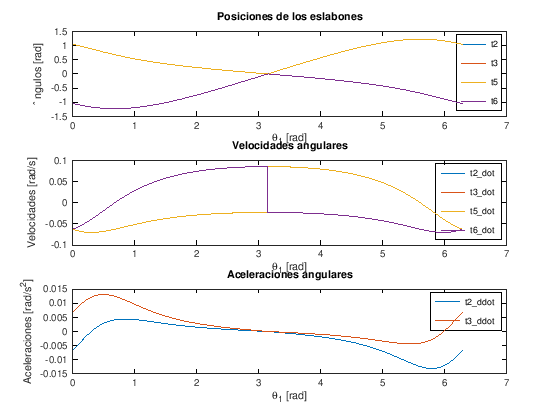

In [ ]:
theta1_vals = linspace(0, 2*pi, 500);
theta1_dot = 0.125;
theta1_ddot = 0;

n = length(theta1_vals);
pos_hist = zeros(n, 6);
vel_hist = zeros(n, 4);
acc_hist = zeros(n, 2);


for i = 1:n
    [pos_hist(i,:), vel_hist(i,:), acc_hist(i,:)] = solve(theta1_vals(i), theta1_dot, theta1_ddot);
end

figure;

subplot(3,1,1);
plot(theta1_vals, pos_hist(:,1:4));
legend('t2','t3','t5','t6');
xlabel('\theta_1 [rad]'); ylabel('Ángulos [rad]');
title('Posiciones de los eslabones');

subplot(3,1,2);
plot(theta1_vals, vel_hist);
legend('t2\_dot','t3\_dot','t5\_dot','t6\_dot');
xlabel('\theta_1 [rad]'); ylabel('Velocidades [rad/s]');
title('Velocidades angulares');

subplot(3,1,3);
plot(theta1_vals, acc_hist);
legend('t2\_ddot','t3\_ddot');
xlabel('\theta_1 [rad]'); ylabel('Aceleraciones [rad/s^2]');
title('Aceleraciones angulares');

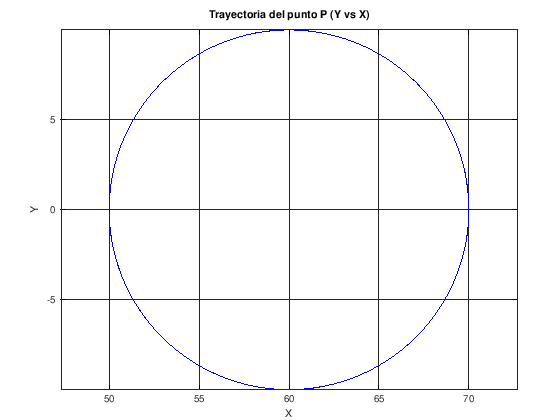

In [ ]:
graphics_toolkit gnuplot

fid = fopen('PxvsPy.csv', 'r');
fgetl(fid);
data = textscan(fid, '%f%f%f', 'Delimiter', ',');
fclose(fid);

x = data{2};
y = data{3};

figure;
plot(x, y, 'b-', 'LineWidth', 1.5);
grid on;
axis equal;
xlabel('X');
ylabel('Y');
title('Trayectoria del punto P (Y vs X)');
